In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
import numpy as np

In [59]:
df = pd.read_csv('credit_card_churn.csv')
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

Data Exploration
ข้อมุลไม่มีช่องไหนที่หายไป
ข้อมูลประกอบไปด้วย feature 21 ตัวดังนี้
- Clientnum: หมายเลขที่ใช้ระบุลูกค้า
- Customer Age: อายุ
- Gender: เพศ
- Dependent count: จำนวนบุตรที่อยู่ในการอุปการะ
- Education level: การศึกษา
- Martial Status: สถานภาพ
- Income Category: หมวดหมู่รายได้ประจำปี
- Card Category: ชนิดของบัตรที่ถือ
- Months on book: **
- Total Relationship Count: จำนวน product ที่ถืออยู่
- Month inactive last 12 months: จำนวนเดือนที่ไม่ได้ใช้งาน
- Contact Count last 12 months: จำนวนการติดต่อ
- Credit Limit: จำกัดวงเงินในบัตรเครดิต
- Total Revolving Balance: ยอดเงินหมุนเวียนในบัตรเครดิต
- Average Open to buy: **
- Change in Transaction Amount (Q4 over Q1): ยอดการเปลี่ยนแปลงธุรกรรม
- Total Transaction Amount (Last 12 months): ยอดรวมธุรกรรม
- Total transaction count last 12 months: จำนวนธุรกรรม
- Change in Transaction Count (Q4 over Q1): จำนวนครั้งการเปลี่ยนแปลงธุรกรรม
- Average Card Utilization Ratio: อัตราการใช้บัตรเฉลี่ย
- Attrition_Flag: เธอจะอยู่หรือเธอจะไป

In [ ]:
print(df.isnull().sum())

##### Clientnum
- รหัสลูกค้าเป็นข้อมูลที่ดูไม่มีความสัมพันธุ์อะไรกับข้อมูลอื่นๆที่สื่อถึงการสูญเสียลูกค้าแต่อาจจะมีความสัมพันธุ์กับการระบุตัวตนของผู้ใช้งานหรือประเภทบัตรได้
- เมื่อ plot ดูความสัมพันธุ์แล้วพบว่าไม่มีความสัมพันธุ์ใดๆ จึงทำการตัดข้อมูล Clientnum ออก

In [ ]:
df1 = df[['CLIENTNUM', 'Customer_Age', 'Attrition_Flag']]
card_cat = df['Card_Category']
label_encoder = sklearn.preprocessing.LabelEncoder()
card_cat = label_encoder.fit_transform(card_cat)
df1['Card_Category'] = card_cat
#df1.loc[:, 'Card_Category'] = card_cat
plt.figure(figsize = (8,4))
sns.pairplot(df1, hue="Attrition_Flag")


##### Customer Age
    - ข้อมูลอายุมีการกระจายเกือบจะเป็น normal distribution โดยลูกค้าส่วนมากมีอายุช่วง 40 - 50 ปี มีความแปรปรวนเท่ากับ 64
    - ช่วงอายุไม่มีความสัมพันธุ์กับการสูญเสียลูกค้าทั้ง Existing customer และ Attrited customer มีอายุเฉลี่ยประมาณ 45 เท่ากัน
    - ช่วงอายุที่มากกว่า 66 อาจพิจารณาเป็น outlier
    - ข้อมูลอายุมีความสัมพันธุ์กับฟีเจอร์ month on book

In [ ]:
df = df.drop(['CLIENTNUM'], axis=1)
cols = df.columns
num_data = list(df._get_numeric_data().columns)
cat_data = list(set(cols) - set(num_data))
num_data.remove('Dependent_count')
num_data.remove('Total_Relationship_Count')
num_data.remove('Months_Inactive_12_mon')
num_data.remove('Contacts_Count_12_mon')
cat_data.remove('Attrition_Flag')
cat_data.append('Dependent_count')
cat_data.append('Total_Relationship_Count')
cat_data.append('Months_Inactive_12_mon')
cat_data.append('Contacts_Count_12_mon')
num_data_plot = num_data
cat_data_plot = cat_data

In [ ]:
plt.figure(figsize = (6,3))
sns.boxplot(data=df, x='Attrition_Flag', y='Customer_Age')
plt.figure(figsize = (6,3))
sns.histplot(data=df, x="Customer_Age", hue="Attrition_Flag", multiple="stack", kde=True)
df['Customer_Age'].describe()

In [ ]:
num_data_plot.remove('Customer_Age')
for i in num_data_plot:
    sns.pairplot(data=df, x_vars= i, y_vars=["Customer_Age"], hue = 'Attrition_Flag')
    plt.show()
for j in cat_data_plot:
    sns.boxplot(data=df, x=j, y='Customer_Age', hue = 'Attrition_Flag')
    plt.show()

##### Gender
    - จำนวนประชากรเพศชายกับหญิงมีจำนวนห่างกันเพียง 589 คน
    - ข้อมูลเพศของลูกค้าไม่มีความสัมพันธุ์กับ output ของข้อมูล และไม่มีความสัมพันธุ์ใดๆกับข้อมูลอื่นๆ
    - เพศหญิงมี credit limit และ Avg_open_to_buy ต่ำกว่าเพศชายอย่างเห็นได้ชัด
    - ในข้อมูลของ income กลุ่มที่มีรายได้ต่ำกว่า 40000 และรายได้ที่ไม่ทราบส่วนใหญ่เป็นเพศหญิง
    - กลุ่มรายได้ 60k-80k, 80k-120k, 120k+ ส่วนใหญ่เป็นเพศชาย

In [ ]:
plt.figure(figsize = (6,3))
sns.countplot(data=df, x="Gender", hue="Attrition_Flag")
df['Gender'].value_counts()

In [ ]:
for i in num_data_plot:
    sns.boxplot(data=df, x='Gender', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data_plot.remove('Gender')
for j in cat_data_plot:
    sns.countplot(data=df, x=j, hue="Gender")
    plt.show()

##### Dependent Count
    - ลูกค้าส่วนมากมีบุตร 2-3 คน
    - จำนวนบุตรไม่มีความสัมพันธุ์ใดๆกับข้อมูลอื่นๆจึงพิจารณาที่จะตัดทิ้งได้
    - เมื่อ plot total_trans_ct กับ dependent count ทำให้เห็นการจัดกลุ่มของการสูญเสียลูกค้าได้ดีมีซ้อนบ้างเล็กน้อย
    - แต่การดู boxplot ทำให้เห็นได้ชัดเจนว่าข้อมูล total revolving balance ดูมีความสัมพันธุ์กับการสูญเสียลูกค้า

In [ ]:
sns.histplot(data=df, x="Dependent_count", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
for i in num_data_plot:
    sns.boxplot(data=df, x='Dependent_count', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data_plot.remove('Dependent_count')
for j in cat_data_plot:
    sns.countplot(data=df, x=j, hue="Dependent_count")
    plt.show()

##### Education Level
    - ลูกค้าส่วนมากเป็นลูกค้าที่เรียนจบแล้ว
    - จากการวิเคราะฟีเจอร์ Dependent count ซึ่งพบว่า total_trans_ct เมื่อ plot กับ dependent count ทำให้เห็นการจัดกลุ่มของการสูญเสียลูกค้าได้ดีแต่ยังเห็นบางส่วนที่ซ้อนกันแต่เมื่อ plot กับ Education Level แล้วพบว่าเกิดการแบ่งกลุ่มของการสูญเสียลูกค้าได้อย่างชัดเจน

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x="Education_Level", hue="Attrition_Flag")
df['Education_Level'].value_counts()

In [ ]:
for i in num_data_plot:
    sns.boxplot(data=df, x='Education_Level', y= i, hue = 'Attrition_Flag')
    plt.show()
    
cat_data_plot.remove('Education_Level')
for j in cat_data_plot:
    sns.countplot(data=df, x=j, hue="Education_Level")
    plt.show()

##### Marital Status
    - สถานภาพไม่มีความสัมพันธุ์ใดๆกับข้อมูลอื่นๆ

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x="Marital_Status", hue="Attrition_Flag")
df['Marital_Status'].value_counts()

In [ ]:
for i in num_data_plot:
    sns.boxplot(data=df, x='Marital_Status', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data_plot.remove('Marital_Status')
for j in cat_data_plot:
    sns.countplot(data=df, x=j, hue="Marital_Status")
    plt.show()

##### Income Category
    - ลูกค้าส่วนใหญ่มีรายได้ต่ำกว่า 40000
    - คนที่มีรายได้มากกว่า 120k มี credit limit และ avg_open_to_buy สูงกว่ากลุ่มอื่นๆ

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x="Income_Category", hue="Attrition_Flag")
df['Income_Category'].value_counts()

In [ ]:
for i in num_data_plot:
    sns.boxplot(data=df, x='Income_Category', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data_plot.remove('Income_Category')
for j in cat_data_plot:
    sns.countplot(data=df, x=j, hue="Income_Category")
    plt.show()

##### Card Category
    - ผู้ใช้งานส่วนมากเป็นผู้ใช้งานระดับ Blue
    - ผู้ใช้งานระดับ Blue มี avg_open_to_buy และ credit limit ต่ำกว่ากลุ่มอื่นๆแต่เนื่องจากข้อมูลที่ไม่ใช่ระดับ Blue น้อยมากจึงพิจารณาที่จะตัดข้อมูลนี้ทิ้ง

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x="Card_Category", hue="Attrition_Flag")
df['Card_Category'].value_counts()

In [ ]:
for i in num_data_plot:
    sns.boxplot(data=df, x='Card_Category', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data_plot.remove('Card_Category')
for j in cat_data_plot:
    sns.countplot(data=df, x=j, hue="Card_Category")
    plt.show()

##### Months_on_book
    - จำนวนมากสุด 36 คือ 2463 คน
    - ข้อมูลไม่มีความสัมพันธุ์ใดๆกับข้อมูลอื่นๆ

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Months_on_book", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
num_data_plot.remove('Months_on_book')
for i in num_data_plot:
    sns.pairplot(data=df, x_vars= i, y_vars=["Months_on_book"], hue = 'Attrition_Flag')
    plt.show()
for j in cat_data_plot:
    sns.boxplot(data=df, x=j, y='Months_on_book', hue = 'Attrition_Flag')
    plt.show()

##### Total_Relationship_Count
    - ข้อมูลไม่มีความสัมพันธุ์โดยตรงกับ Attrition Flag
    - แต่เมื่อ plot กับ total_trans_amt พบว่าเกิดการแบ่งแยกของ Attriton Flag แต่ยังมีทับซ้อนกันบางส่วน

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Relationship_Count", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
for i in num_data_plot:
    sns.boxplot(data=df, x='Total_Relationship_Count', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data_plot.remove('Total_Relationship_Count')
for j in cat_data_plot:
    sns.countplot(data=df, x=j, hue="Total_Relationship_Count")
    plt.show()

In [ ]:
sns.pairplot(df, x_vars= 'Total_Trans_Amt', y_vars=["Total_Relationship_Count"], hue = 'Attrition_Flag')
plt.show()

##### Months Inactive 12_mon
    - ข้อมูลมีความสัมพันธุ์กับ total revolving balance และ total_trans_ct

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Months_Inactive_12_mon", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
for i in num_data_plot:
    sns.boxplot(data=df, x='Months_Inactive_12_mon', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data_plot.remove('Months_Inactive_12_mon')
for j in cat_data_plot:
    sns.countplot(data=df, x=j, hue="Months_Inactive_12_mon")
    plt.show()

##### Contacts_Count_12_mon
    - contacts_count_12_mon จำนวน 6 ครั้ง พบว่าเป็นลูกค้าที่เสียไปทั้งหมด แต่เป็นเพียงข้อมูลเล็กน้อยของข้อมูลทั้งหมด
    - ข้อมูลมีความสัมพันธุ์กับ Total_Revolving_Bal แต่ยังคงไม่ชัดเจนและมีส่วนที่ซ้อนทับกันจำนวนมาก

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Contacts_Count_12_mon", hue="Attrition_Flag", multiple="stack", kde=True)
df['Contacts_Count_12_mon'].value_counts()

In [ ]:
for i in num_data_plot:
    sns.boxplot(data=df, x='Contacts_Count_12_mon', y= i, hue = 'Attrition_Flag')
    plt.show()
cat_data_plot.remove('Contacts_Count_12_mon')

##### Credit_Limit
    - จำนวน credit limit มีลักษณะ right skewed จึงทำการ correct skewed data ด้วยวิธีการ Box-cox แต่ส่งผลให้รูปแบบความสัมพันธุ์ของ Credit_Limit กับ Avg_open_to_buy เปลี่ยนจาก linear เป็น parabola
    - ข้อมูลมีความสัมพันธุ์กับ Avg_Utilization_Ratio เมื่อ Credit_Limit เพิ่มมากขึ้น Avg_Utilization_Ratio ก็จะต่ำลงอย่างเห็นได้ชัด

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

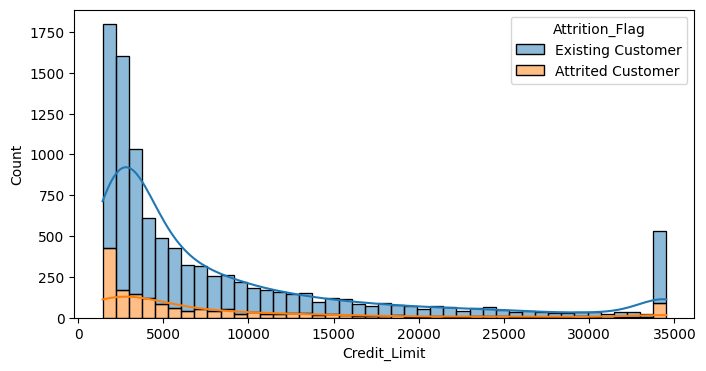

In [39]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Credit_Limit", hue="Attrition_Flag", multiple="stack", kde=True)

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

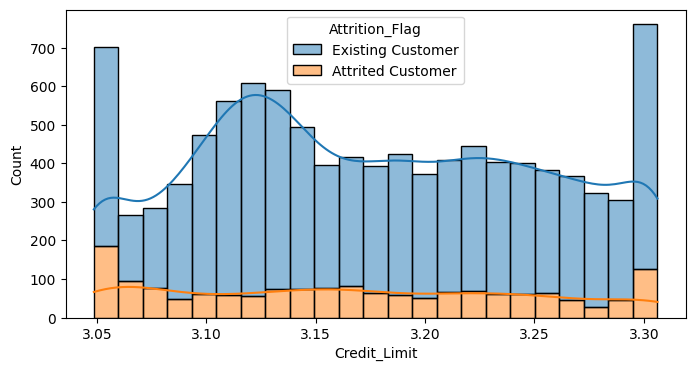

In [56]:
from scipy import stats

df1 = df
df1['Credit_Limit'], fitted_lambda  = stats.boxcox(df1['Credit_Limit'].values)
plt.figure(figsize = (8,4))
sns.histplot(data=df1, x="Credit_Limit", hue="Attrition_Flag", multiple="stack", kde=True)

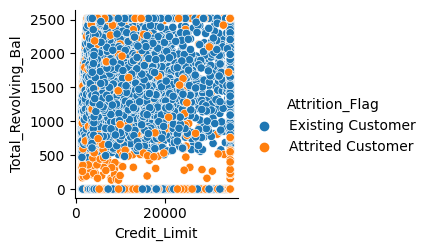

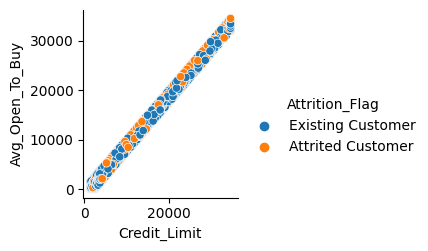

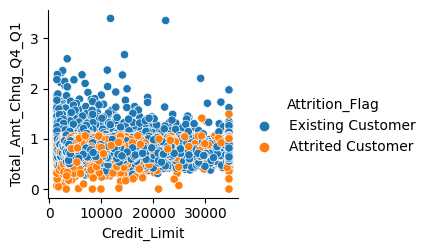

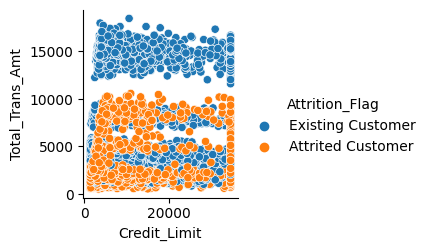

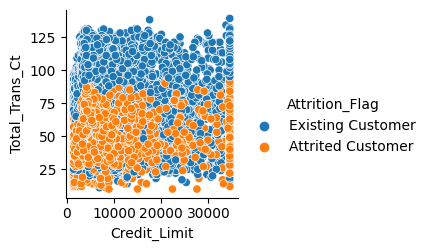

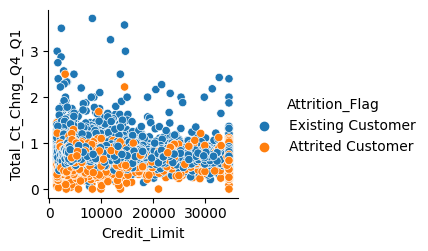

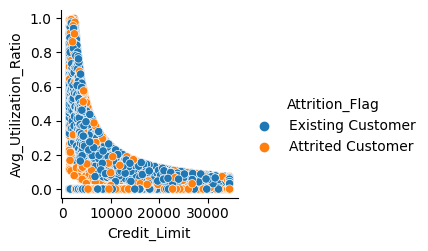

In [60]:
num_data_plot.remove('Credit_Limit')
for i in num_data_plot:
    sns.pairplot(data=df, x_vars='Credit_Limit', y_vars= i, hue = 'Attrition_Flag')
    plt.show()


##### Total_Revolving_Bal
    - ข้อมูลมีความสัมพันธุ์กับข้อมูล Avg_Utilization_Ratio แต่มีความแปรปรวนมาก

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

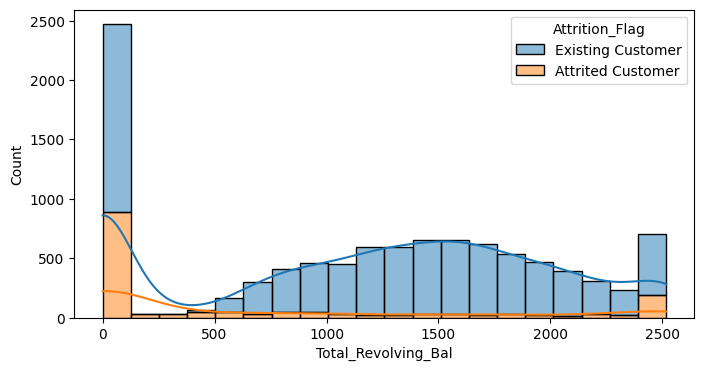

In [61]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Revolving_Bal", hue="Attrition_Flag", multiple="stack", kde=True)

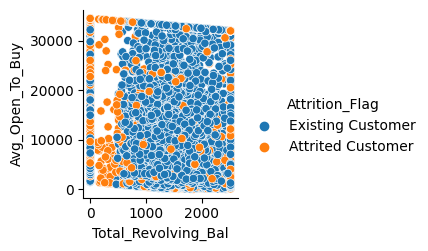

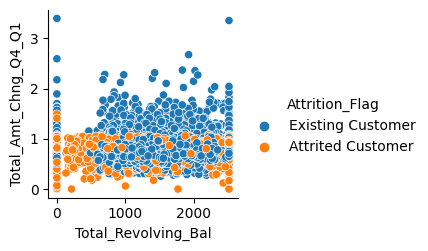

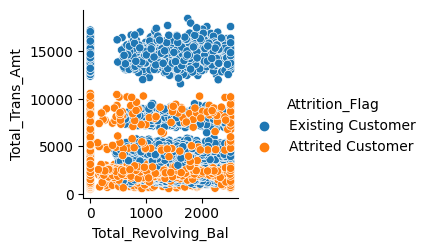

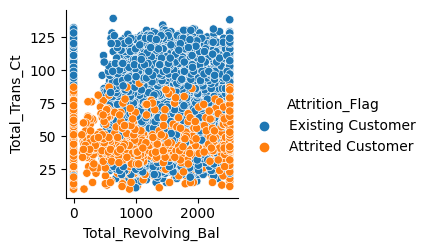

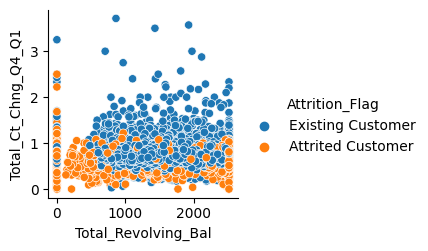

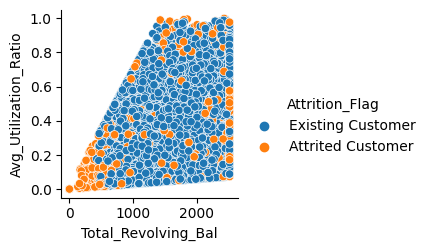

In [62]:
num_data_plot.remove('Total_Revolving_Bal')
for i in num_data_plot:
    sns.pairplot(data=df, x_vars='Total_Revolving_Bal', y_vars= i, hue = 'Attrition_Flag')
    plt.show()


##### Avg_Open_To_Buy
    - ข้อมูล Avg_open_To_Buy มีความสัมพันธุ์กับ Avg_Utilzation_Ratio เมื่อค่า Avg_open_To_Buy มากขึ้น Avg_Utilzation_Ratio ลดลงอย่างเห็นได้ชัด


<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Count'>

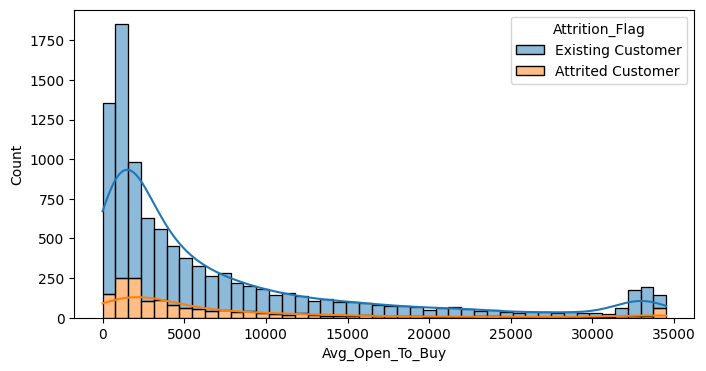

In [63]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Avg_Open_To_Buy", hue="Attrition_Flag", multiple="stack", kde=True)

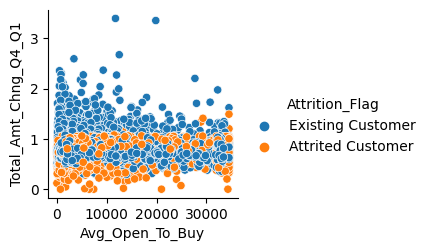

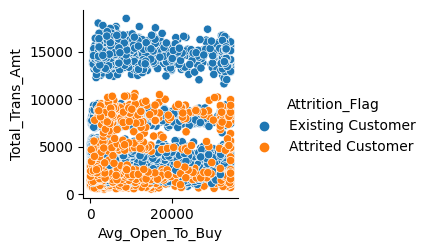

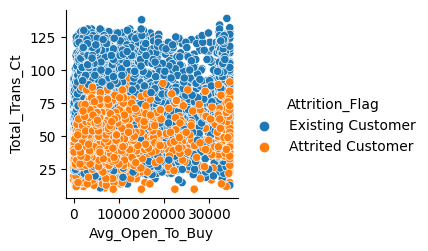

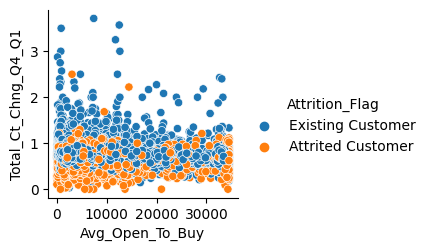

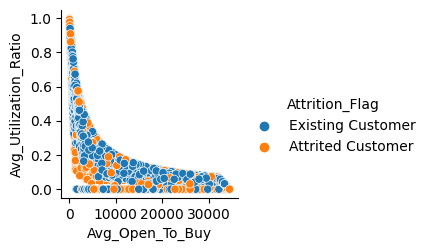

In [65]:
num_data_plot.remove('Avg_Open_To_Buy')
for i in num_data_plot:
    sns.pairplot(data=df, x_vars='Avg_Open_To_Buy', y_vars= i, hue = 'Attrition_Flag')
    plt.show()


##### Total_Amt_Chng_Q4_Q1
    - จากกราฟ histrogram จะสังเกตุได้ว่าเมื่อ Total_Amt_Chng_Q4_Q1 มากกว่า 1 ข้อมูลที่เหลือจะเป็น Existing Customer แต่เป็นเพียงข้อมูลส่วนน้อย
    - Total_Amt_Chng_Q4_Q1 มีความสัมพันธุ์กับ Total_Trans_Amt มองเห็นการแบ่งกลุ่มอย่างชัดเจนเมื่อ Total_Trans_Amt มากกว่า 12000 แต่ยังคงมีกลุ่มที่ซ้อนทับกันอยู่ในช่วงที่ต่ำกว่า 12000
    - ลูกค้าที่เป็น Attrited Customer มีค่า (Total_Amt_Chng_Q4_Q1,Total_Trans_Ct) เกาะกลุ่มในช่วง (0,0) ถึง (1,75)
    - ลูกค้าที่เป็น Attrited Customer มีค่า (Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1) เกาะกลุ่มในช่วง (0,0) ถึงประมาณ (1,1)

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

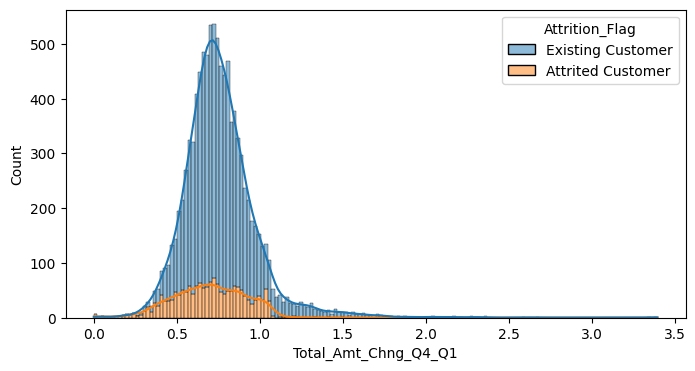

In [66]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Amt_Chng_Q4_Q1", hue="Attrition_Flag", multiple="stack", kde=True)

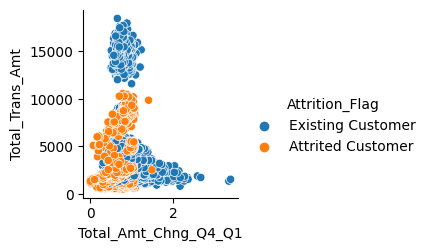

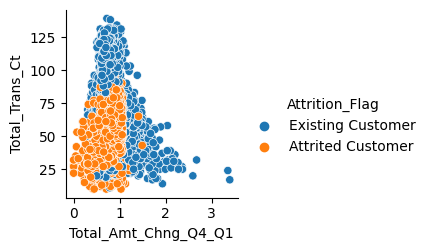

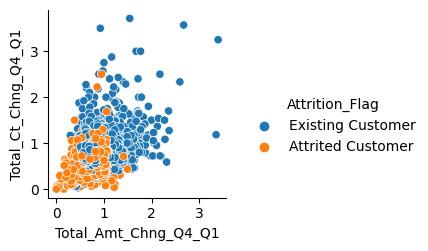

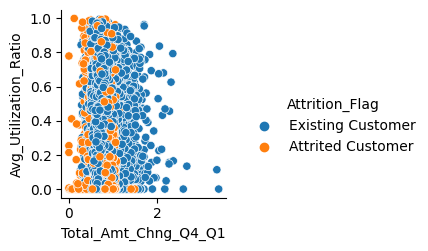

In [67]:
num_data_plot.remove('Total_Amt_Chng_Q4_Q1')
for i in num_data_plot:
    sns.pairplot(data=df, x_vars='Total_Amt_Chng_Q4_Q1', y_vars= i, hue = 'Attrition_Flag')
    plt.show()


##### Total_Trans_Amt
    - จากกราฟการกระจายตัวของข้อมูลพบว่าเมื่อ Total_Trans_Amt มีค่ามากกว่า 10000 ลูกค้าส่วนใหญ่เป็น Attrited Customer
    - ความสัมพันธุ์ระหว่าง Total_Trans_Amt และ Total_Trans_Ct มีการแบ่งกลุ่ม Output
    - ความสัมพันธุ์ระหว่าง Total_Trans_Amt และ Total_Ct_Chng_Q4_Q1 มีการแบ่งกลุ่ม Output
    - ความสัมพันธุ์ระหว่าง Total_Trans_Amt และ Avg_Utilization_ratio มีการแบ่งกลุ่ม Output

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

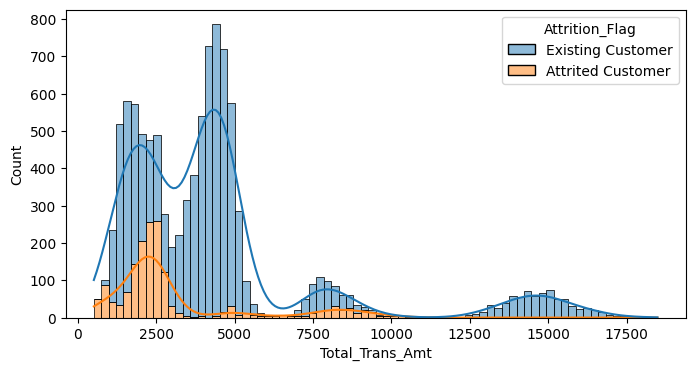

In [68]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Trans_Amt", hue="Attrition_Flag", multiple="stack", kde=True)

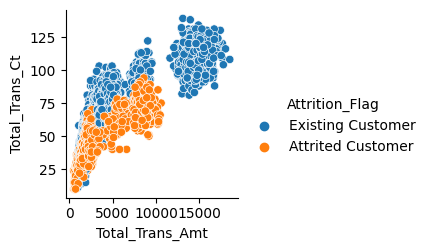

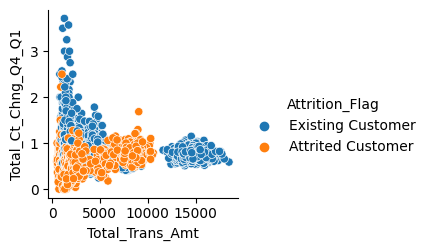

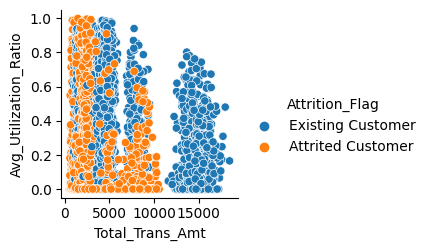

In [69]:
num_data_plot.remove('Total_Trans_Amt')
for i in num_data_plot:
    sns.pairplot(data=df, x_vars='Total_Trans_Amt', y_vars= i, hue = 'Attrition_Flag')
    plt.show()


##### Total_Trans_Ct

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

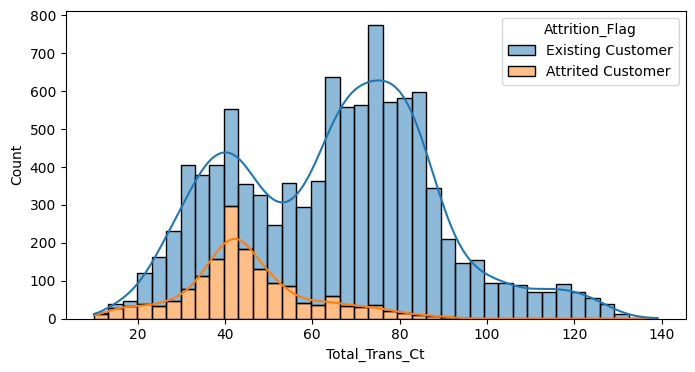

In [70]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Trans_Ct", hue="Attrition_Flag", multiple="stack", kde=True)

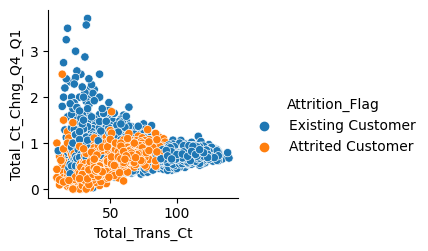

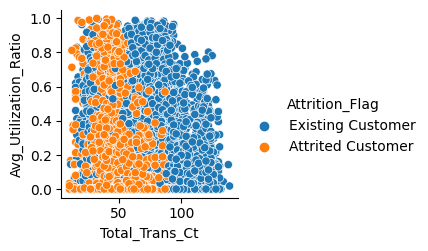

In [71]:
num_data_plot.remove('Total_Trans_Ct')
for i in num_data_plot:
    sns.pairplot(data=df, x_vars='Total_Trans_Ct', y_vars= i, hue = 'Attrition_Flag')
    plt.show()


##### Total_Ct_Chng_Q4_Q1

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

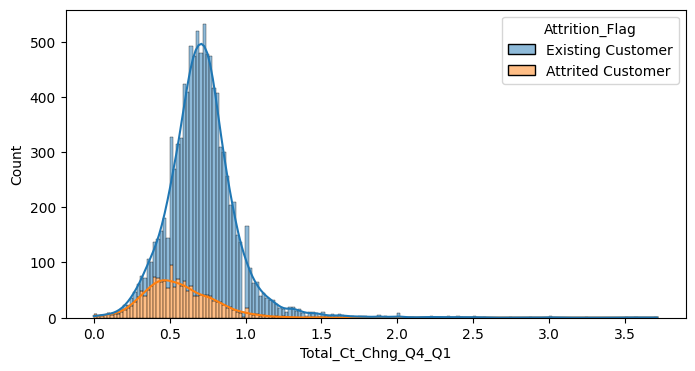

In [72]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Ct_Chng_Q4_Q1", hue="Attrition_Flag", multiple="stack", kde=True)

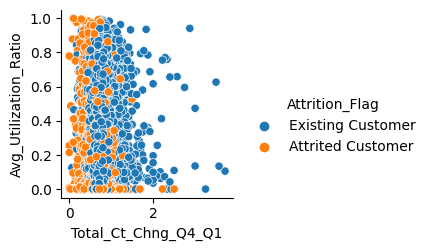

In [73]:
num_data_plot.remove('Total_Ct_Chng_Q4_Q1')
for i in num_data_plot:
    sns.pairplot(data=df, x_vars='Total_Ct_Chng_Q4_Q1', y_vars= i, hue = 'Attrition_Flag')
    plt.show()


##### Avg_Utilization_Ratio
    - ข้อมูลมีลักษณะแบบ right skewed

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

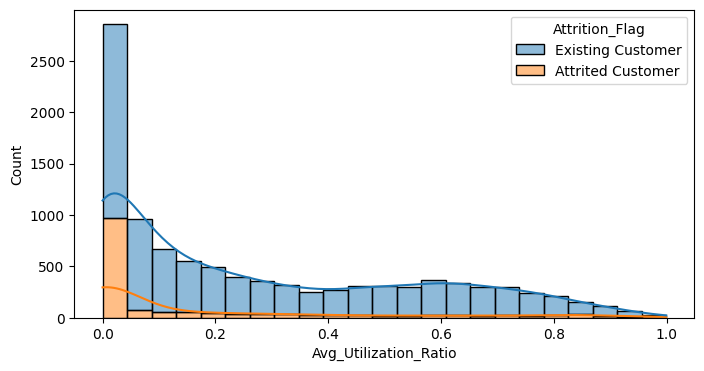

In [74]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Avg_Utilization_Ratio", hue="Attrition_Flag", multiple="stack", kde=True)

##### Note

In [ ]:
a = df.groupby('Attrition_Flag')
a.mean()

In [ ]:
import sklearn.preprocessing

x = df.drop(['Attrition_Flag'], axis = 1)
y = df['Attrition_Flag']

x = pd.get_dummies(x)
label_encoder = sklearn.preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
import sklearn.feature_selection
from sklearn.feature_selection import chi2

selector = sklearn.feature_selection.SelectKBest(chi2, k=4)
x_new = selector.fit(x,y)
col = selector.get_support(indices=True)   #all indices are saved in col.
x_new = x.iloc[:,col]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_new)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.1,random_state = 0)

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

In [ ]:
y_pred = model_logistic.predict(x_train)

from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)           # Create PCA transformer
x_pca = pca.fit_transform(x)
print(pca.explained_variance_ratio_)
pd.DataFrame(x_pca).head()

In [ ]:
sns.pairplot(df, hue = 'Attrition_Flag')